In [252]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [6]:
data = np.genfromtxt('dataset.csv', delimiter = ",", skip_header = 1)

In [16]:
x_train = data[0:150, 0]
y_train = data[0:150, 1].astype(int)

x_test = data[150:, 0]
y_test = data[150:, 1].astype(int)

In [230]:
minimum_value = 1.5
maximum_value = 5.2

data_interval = np.round(np.linspace(minimum_value, maximum_value, 3701), decimals = 3)

In [231]:
# Regressogram

bin_width = 0.37
left_borders = np.arange(minimum_value, maximum_value, bin_width)
right_borders = np.arange(minimum_value + bin_width, maximum_value + bin_width, bin_width)

g_hat = np.asarray([np.mean( 
                            y_train[(left_borders[b] < x_train) & 
                                    (right_borders[b] >= x_train)]) 
                    for b in range(len(left_borders))])

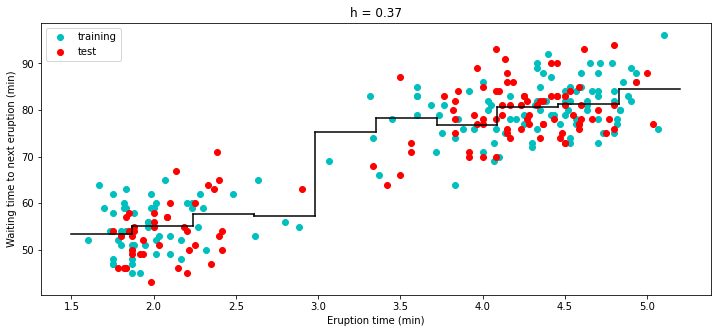

In [232]:
plt.figure(figsize = (12, 5))
plt.plot(x_train, y_train, "co", label = "training")
plt.plot(x_test, y_test, "ro", label = "test")

for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [g_hat[b], g_hat[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [g_hat[b], g_hat[b + 1]], "k-")   

plt.title(f"h = {bin_width}")
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time to next eruption (min)')
plt.legend()
plt.show()

In [233]:
RMSE = np.sqrt(np.mean([(y_test[i] - g_hat[(left_borders < x_test[i]) &
                                           (right_borders >= x_test[i])])**2 for i in range(len(y_test))]))

print(f"Regressogram => RMSE is {RMSE:.4f} when h is {bin_width}")

Regressogram => RMSE is 5.9626 when h is 0.37


In [248]:
#Running Mean Smoother
bin_width = 0.37

g_hat = np.asarray([np.mean(y_train[((x - 0.5 * bin_width) < x_train) 
                                    & (x_train <= (x + 0.5 * bin_width))]) 
                    for x in data_interval])

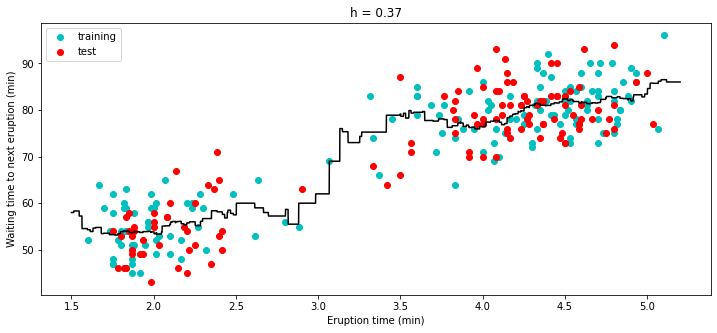

In [249]:
plt.figure(figsize = (12, 5))
plt.plot(x_train, y_train, "co", label = "training")
plt.plot(x_test, y_test, "ro", label = "test")

plt.plot(data_interval, g_hat, "k-")

plt.title(f"h = {bin_width}")
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time to next eruption (min)')
plt.legend()
plt.show()

In [247]:
RMSE = np.sqrt(np.mean((y_test - np.concatenate([g_hat[np.where(data_interval == x)] for x in x_test])) ** 2))

print(f"Running Mean Smoother => RMSE is {RMSE:.4f} when h is {bin_width}")

Running Mean Smoother => RMSE is 6.0890 when h is 0.37


In [294]:
#Kernel Smoother

bin_width = 0.37

g_hat = np.asarray([np.sum(np.exp(-0.5 * (x - x_train)**2 / bin_width**2)*y_train) 
                    / np.sum(np.exp(-0.5 * (x - x_train)**2 / bin_width**2)) 
                    for x in data_interval])

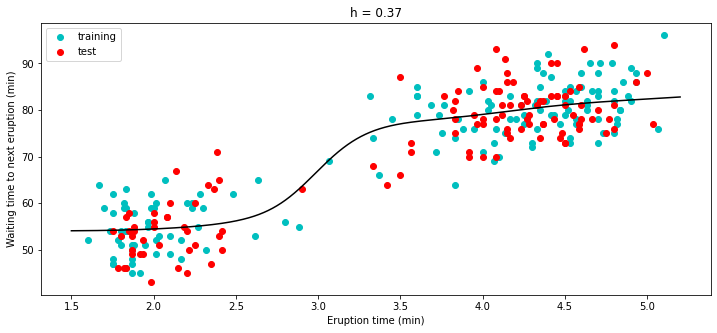

In [296]:
plt.figure(figsize = (12, 5))
plt.plot(x_train, y_train, "co", label = "training")
plt.plot(x_test, y_test, "ro", label = "test")

plt.plot(data_interval, g_hat, "k-")

plt.title(f"h = {bin_width}")
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time to next eruption (min)')
plt.legend()
plt.show()

In [297]:
RMSE = np.sqrt(np.mean((y_test - np.concatenate([g_hat[np.where(data_interval == x)] for x in x_test])) ** 2))

print(f"Kernel Smoother => RMSE is {RMSE:.4f} when h is {bin_width}")

Kernel Smoother => RMSE is 5.8744 when h is 0.37
